## Predicting the age of Abalone using SVM and Random Forest Regressor
**Author: Prathyusha Sangam**

### Document Outline
* [About the data](#About-the-data)
* [Project objective](#Project-objective)
* [Step 1: Set up imports](#Step-1:-Set-up-imports)
* [Step 2: Load and Inspect Data](#Step-2:-Load-and-Inspect-Data)
    * [Visualization: Inspect the data for correlations](#Visualization:-Inspect-the-data-for-correlations)
    * [Findings from correlation inspection](#Findings-from-correlation-inspection)
    * [Expected challenge](#Expected-challenge)
* [Step 3: Data Cleaning](#Step-3:-Data-Cleaning)
* [Step 4: Train Test Splits and Data Normalization](#Step-4:-Train-Test-Splits-and-Data-Normalization)
* [Step 5: Random Forest Regressor](#Step-5:-Random-Forest-Regressor)
* [Step 6: Fine tuning Hyperparameters of Random Forest Regressor using GridSearchCV](#Step-6:-Fine-tuning-Hyper-parameters-of-Random-Forest-Regressor-using-GridSearchCV)
* [Step 7: Ordering feature importances](#Step-7:-Ordering-feature-importances)
    * [Summarizing the results of Random Forest Regressor and hyperparameter tuning (step-5,6,7)](#Summarizing-the-results-of-Random-Forest-Regressor-and--hyperparameter-tuning-(step-5,6,7))
* [Step 8: Retraining RF-regressor using best hyperparameters and important features](#Step-8:-Retraining-RF-regressor-using-best-hyperparameters-and-important-features)
    * [Analysing the RF regressor using best hyperparameters and important features](#Analysing--the-RF-regressor-using-best-hyperparameters-and-important-features)
    * [Analysis of plots of Actual vs Predicted values](#Analysis-of-plots-of-Actual-vs-Predicted-values)
* [Step 9:SVM Regressor with RBF Kernel](#Step-9:-SVM-Regressor-with-RBF-Kernel)
* [Step 10: Logistic regressor](#Step-10:-Logistic-regressor)
* [Step 11: Conclusion](#Step-11:-Conclusion)

### About the data
**Abalone Data Set:** The data is obtained from UCI repository, originally contributed by Department of Primary Industry and Fisheries, Tasmania and The University of Tasmania. This labelled dataset contains various physical attributes of abalone (sea snails), which could be used to predict their age.

**Attributes:**
* Sex (Male /Female /Infant)
* Length (in mm)
* Diameter (in mm)
* Height (in mm)
* Whole weight (in gm)
* Shucked weight (in gm)
* Viscera weight (in gm)
* Shell weight (in gm)
* Rings (number)

Age in years is defined by Number of Rings+1.5

### Project objective
* Train machine learning regressors to predict the number of rings, given the physical attributes of abalone.
* Techniques used: Random forest regressor, SVM regressor with a RBF kernel, logistic regressor
* Compare the performance of the techniques used

### Step 1: Set up imports

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# allowing multiple/scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Step 2: Load and Inspect Data

In [2]:
#load data
abalone = pd.read_csv("Datasets/abalone.data", sep = ',',header=None)

#assign column names
abalone.columns=['sex','length','diameter','height','whole_weight',
                 'shucked_weight','viscera_weight','shell_weight','rings']


In [3]:
#inspecting how data looks like
abalone.head()
abalone.shape
#abalone.info()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


(4177, 9)

### Visualization: Inspect the data for correlations
To understand the correlation between 'rings' vs the physical attributes of abalone, we plot scatterplots as below

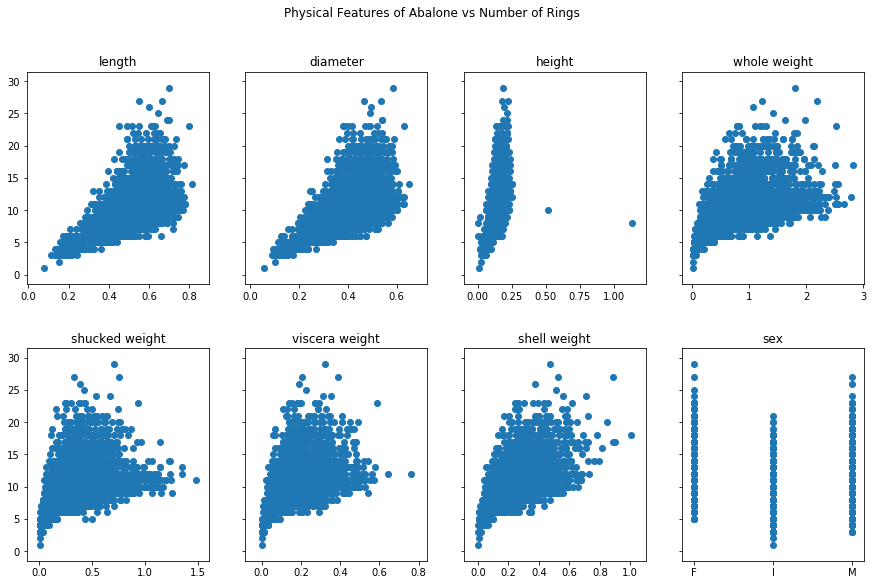

In [4]:
# plotting Physical Features of Abalone vs Number of Rings

f, ((ax1, ax2, ax3, ax4),(ax5 , ax6 , ax7, ax8)) = plt.subplots(2, 4, sharey='row')
_= f.suptitle('Physical Features of Abalone vs Number of Rings');

_= ax1.scatter(x=abalone.length,y=abalone.rings)
_= ax1.set_title("length");
_= ax2.scatter(x=abalone.diameter,y=abalone.rings)
_= ax2.set_title("diameter");
_= ax3.scatter(x=abalone.height,y=abalone.rings)
_= ax3.set_title("height");
_= ax4.scatter(x=abalone.whole_weight,y=abalone.rings)
_= ax4.set_title("whole weight");
_= ax5.scatter(x=abalone.shucked_weight,y=abalone.rings)
_= ax5.set_title("shucked weight");
_= ax6.scatter(x=abalone.viscera_weight,y=abalone.rings)
_= ax6.set_title("viscera weight");
_=ax7.scatter(x=abalone.shell_weight,y=abalone.rings)
_= ax7.set_title("shell weight");
_=ax8.scatter(x=abalone.sex,y=abalone.rings)
_= ax8.set_title("sex");

f.set_figheight(9)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.3)

### Findings from correlation inspection
* From the scatterplots, we notice that there is no strong relationship between 'rings' and the physical features of abalone.
* There is a weak positive correlation with respect to length, diameter, and weights, however most samples seem concerated around their means.
* Height has no relationship with rings. Some obvious findings are: infants have lesser number of rings.

### Expected challenge
Since we are performing regression and using data with low correlation, we may not be able to achieve very high performance.

### Step 3: Data Cleaning
* Ring values 1, 2, and 3 have very small numbers of instances. **Decision: Group 1-3 into 3.**
* Similarly, small number of instances in Ring values 23-29 are seen. **Decision: group 23-29 into 23.**
* Remap the entries in the “sex” column to numerical values. **Decision: Male =0, Female =1, Infant =2 **

Text(0.5,1,'Disproportionate distribution of ring values')

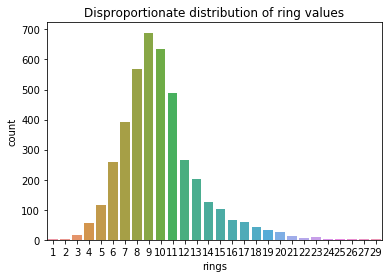

In [5]:
# Class distributions
sns.countplot('rings',data= abalone).set_title('Disproportionate distribution of ring values')

In [6]:
#replace class values with small number of instances

abalone['rings'] = abalone['rings'].replace([1,2],3)
abalone['rings'] = abalone['rings'].replace([24,25,26,27,28,29],23)

#Remap the entries in the “sex” column to numerical values

abalone['sex'] = abalone['sex'].map( {'M': 0,'F': 1,'I': 2 } ).astype(int)
#can also use .replace for this

### Step 4: Train-Test Splits and Data Normalization

Before performing the regression task, we will make Train Test splits in 80:20 ratio (industry recommended). Since there are huge variations in number of samples of each category, we can perform stratified sampling.

Naming convention of the train-test splits:
* X_train: Training data frame containing features - without target values
* y_train: Target values for training
* X_test: Testing data frame containing features - without targets values
* y_test: Original data target values of test data


In [7]:
#Separating X and y from original dataframe

X = abalone.drop('rings',axis=1)
y = abalone['rings']

# uncomment to inspect the columns chosen
# X.head()
# y.head()

#Test train splits

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2, random_state = 42)

# Feature scaling using Standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


***A note about scaling of the target values (y):
We know feature scaling improves convergence, but scaling of target values is not necessary. However, if we scale the target values, the root mean squared error is automatically scaled and wouldn't represent the true scale of target values, giving an impression of a smaller error. This is why R^2 (coefficient of determination) is the default performance measure of all regressors in SciKit learn. Since we are to use RMSE as our performance measure in this labsheet, I have mentioned this note, to avoid any misunderstanding about larger/smaller RMSEs obtained in comparison other students. ***

### Step 5: Random Forest Regressor
In this step we define a baseline model of a Random Forest Regressor.5-fold cross validation used on training set. Hyperparameter consideration for baseline model is as follows:
* max features=1.0 for using 100% of all attributes
* n_estimators = 100 

Note: Random Forest Regressor's score() function returns R^2 value (coefficient of determination) by default. For evaluating the performance of regressors using RMSE, it must be computed from 'mean squared error.

In [8]:
#Define the RF regressor - Baseline model
from sklearn.ensemble import RandomForestRegressor
baseline_rf = RandomForestRegressor(random_state=42, max_features=1.0, n_estimators=100)

# Train the RF regressor
baseline_rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [9]:
# Reporting RMSE using cross validation with 5 folds

#For training set
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt

baseline_mse = cross_val_score(baseline_rf, X_train, y_train, cv=5,n_jobs=1,scoring='neg_mean_squared_error')

baseline_rmse_train = baseline_mse

for i in range(0,len(baseline_mse)):
    baseline_rmse_train[i]= sqrt(abs(baseline_mse[i]))


print('Baseline RMSEs on Train', baseline_rmse_train)

#For testing set
baseline_rf_pred = baseline_rf.predict(X_test)
baseline_rmse_test = sqrt(mean_squared_error(y_test, baseline_rf_pred))
print('Baseline RMSE on Test', baseline_rmse_test)



Baseline RMSEs on Train [2.17331946 2.26880376 1.96204983 2.05935092 2.28711039]
Baseline RMSE on Test 2.159755684614554


In [10]:
#R2 of test
baseline_r2_test = baseline_rf.score(X_test,y_test)
print('Baseline R^2 on Test', baseline_r2_test)

Baseline R^2 on Test 0.5367264935310023


### Step 6: Fine-tuning Hyper-parameters of Random Forest Regressor using GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [20, 10, 8],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = baseline_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_squared_error')


In [12]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train);

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2 ...........
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2 ...........
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2 ...........
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=5, total=   1.6s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=10 ..........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, total=   1.9s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=10 ..........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=5, total=   1

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, total=   1.8s
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10 ..........
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, total=   1.5s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, total=   1.2s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, total=   1.3s
[CV] max_depth=10, min_samples_leaf=4, min_sampl

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.4s finished


In [13]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [14]:
#using Grid Search Best Parameters to see if there is an improvement in performance

besthp_rf= RandomForestRegressor(random_state=42, max_features=1.0,n_estimators=100,
                                 max_depth=8,min_samples_leaf = 4,min_samples_split =10)

besthp_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
#For training set
besthp_mse = cross_val_score(besthp_rf, X_train, y_train, cv=5,n_jobs=1,scoring='neg_mean_squared_error')

besthp_rmse_train = besthp_mse

for i in range(0,len(besthp_mse)):
    besthp_rmse_train[i]= sqrt(abs(besthp_mse[i]))


print('RMSEs on Train after Grid Search', besthp_rmse_train)

#For testing set
besthp_rf_pred = besthp_rf.predict(X_test)
besthp_rmse_test = sqrt(mean_squared_error(y_test, besthp_rf_pred))

print('RMSE on Test after Grid Search', besthp_rmse_test)


RMSEs on Train after Grid Search [2.15906655 2.21112677 1.88529533 2.05910272 2.28035107]
RMSE on Test after Grid Search 2.1232989000892184


In [16]:
#R2 of test
besthp_r2_test = besthp_rf.score(X_test,y_test)
print('R^2 on Test after Grid Search', besthp_r2_test)

R^2 on Test after Grid Search 0.5522346503412912


### Step 7: Ordering feature importances

In [17]:
# listing out the important variables in descending order

names = {'sex','length','diameter','height','whole_weight',
                 'shucked_weight','viscera_weight','shell_weight' }

var_importance = sorted(zip(map(lambda x: round(x, 4), besthp_rf.feature_importances_), names),reverse=True)

var_importance

[(0.6345, 'whole_weight'),
 (0.1578, 'length'),
 (0.0552, 'viscera_weight'),
 (0.0392, 'diameter'),
 (0.0365, 'shell_weight'),
 (0.0274, 'sex'),
 (0.0265, 'shucked_weight'),
 (0.0228, 'height')]

### Summarizing the results of Random Forest Regressor and  hyperparameter tuning (step 5,6,7)
1\. Optimal values of chosen hyperparameters:
* max_depth: 8
* min_samples_leaf: 4
* min_samples_split: 10

2\. On baseline Random Forest Model, 5-fold cross validation RMSEs on the training set,the RMSE on the test set are higher. After hyperparameter tuning the RMSEs on the training set, RMSE on the test set have improved.


3\. 95% variable importance can be obtained from 6 out of 8 features, i.e., excluding 'height'and 'sex'. Note: The Feature importance is prone to variability due to the stochastic nature of random forest trees. On repeated trials, sex and height are least important. This can be confirmed from the histograms as well.

### Step 8: Retraining RF regressor using best hyperparameters and important features
Dropping features height and sex - unimportant features

In [18]:
#Separating X_new and y_new from original dataframe

X_new = abalone.drop(['rings','height','sex'],axis=1)
y_new = abalone['rings']

#Test train splits

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new,
                                                    stratify=y_new, 
                                                    test_size=0.2, random_state = 42)

# Feature scaling using Standard scaler

X_new_train = scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

In [19]:
#using best combination of hyperparams and reduced dimensions for RFR

best_rf= RandomForestRegressor(random_state=42, max_features=1.0,n_estimators=100,
                                 max_depth=8,min_samples_leaf = 4,min_samples_split =10)

best_rf.fit(X_new_train, y_new_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
#For training set
best_mse = cross_val_score(best_rf, X_new_train, y_new_train, cv=5,n_jobs=1,scoring='neg_mean_squared_error')

best_rmse_train = best_mse

for i in range(0,len(best_mse)):
    best_rmse_train[i]= sqrt(abs(best_mse[i]))


print('RMSEs on Train with best hyperparams, imp features', best_rmse_train)

#For testing set
best_rf_pred = best_rf.predict(X_new_test)
best_rmse_test = sqrt(mean_squared_error(y_new_test, best_rf_pred))

print('RMSE with best hyperparams, imp features', best_rmse_test)

RMSEs on Train with best hyperparams, imp features [2.17651397 2.25102924 1.91673382 2.05650224 2.29632258]
RMSE with best hyperparams, imp features 2.163907298298553


In [21]:
#R2 of test
best_r2_test = best_rf.score(X_new_test,y_new_test)
print('R^2 on Test using best hp, reducing dimensions', best_r2_test)

R^2 on Test using best hp, reducing dimensions 0.5349437166955838


### Analysing  the RF regressor using best hyperparameters and important features
1\. As seen above, reducing the dimension has increased the RMSE, indicating decrease in performance.

2\. The below graph shows that best performance (RMSE) was obtained when all features are used on the regressor with best hyperparameter combination.


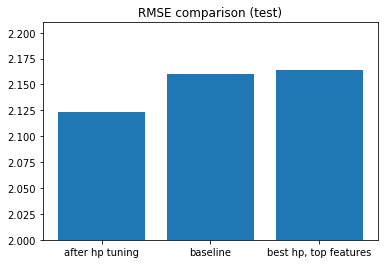

In [22]:
#test RMSEs
x = ['baseline','after hp tuning', 'best hp, top features']
y = [baseline_rmse_test, besthp_rmse_test, best_rmse_test]


_= plt.bar(x,y)
_= plt.title("RMSE comparison (test)")
_= plt.ylim(ymin = 2, ymax = 2.21)

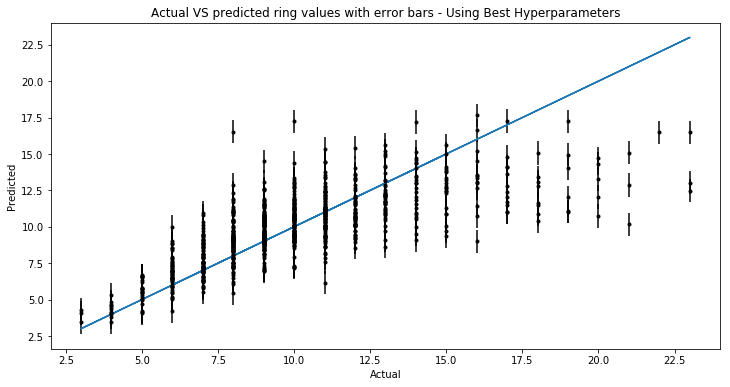

In [23]:
#Actual vs predicted after grid search
y = besthp_rf_pred
dy = 0.8
x = y_test
plt.figure(figsize=(12,6))
plt.title("Actual VS predicted ring values with error bars - Using Best Hyperparameters")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(x, x)
plt.errorbar(x, y, yerr=dy, fmt='.k');


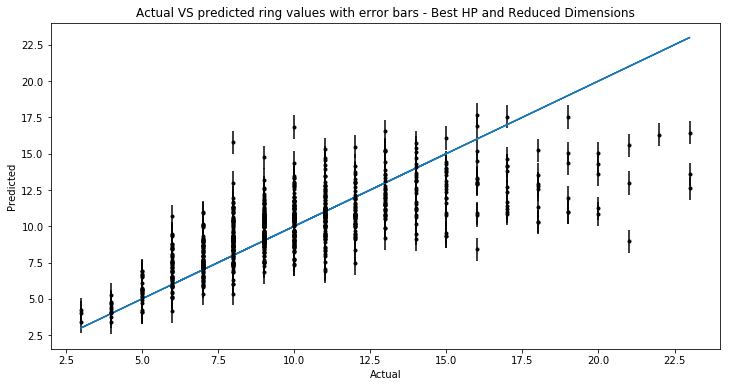

In [24]:
#Actual vs predicted after grid search
y = best_rf_pred
dy = 0.8
x = y_test
plt.figure(figsize=(12,6))
plt.title("Actual VS predicted ring values with error bars - Best HP and Reduced Dimensions")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(x, x)
plt.errorbar(x, y, yerr=dy, fmt='.k');

### Analysis of plots of Actual vs Predicted values

1\. Above are the error graphs of i. actual vs predicted on the regressor with best hyperparameter combination and ii. actual vs predicted on the regressor with best hyperparameter combination and reduced dimensions.

2\. The points on the actual vs predicted graph don't quite lie on the diagonal, indicating that the R^2 value was quite low. The regressors perform better prediction for smaller values of 'rings' than larger values. 

3\. In both the graphs we notice poor performance for ring values above 15, for these values, the regressors predict smaller values than expected/original value of 'rings'.

### Step 9: SVM Regressor with RBF Kernel
* X_train, X_test have already been scaled in the previous steps
* Using all features to train the regressor

In [25]:

# Note: X_train, X_test have already been scaled in the previous steps #Using All dimensions

from sklearn.svm import SVR

#SVR with default hyperparameters
svr = SVR(kernel='rbf')

svr.fit(X_train,y_train)

# Reporting RMSE using cross validation with 5 folds

#For training set
svr_mse = cross_val_score(svr, X_train, y_train, cv=5,n_jobs=1,scoring='neg_mean_squared_error')

svr_rmse_train = svr_mse

for i in range(0,len(svr_mse)):
    svr_rmse_train[i]= sqrt(abs(svr_mse[i]))

print('SVR RMSEs on Train', svr_rmse_train)

# RMSE For testing set
svr_pred = svr.predict(X_test)
svr_rmse_test = sqrt(mean_squared_error(y_test, svr_pred))

print('SVR RMSE on Test', svr_rmse_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR RMSEs on Train [2.20263806 2.2338789  1.84537542 2.10447064 2.30647513]
SVR RMSE on Test 2.1479977940564763


In [26]:
#R2 of test
svr_r2_test = svr.score(X_test,y_test)
print('R^2 on SVR', svr_r2_test)

R^2 on SVR 0.5417569624308223


### Step 10: Logistic regressor

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train,y_train)

# Reporting RMSE using cross validation with 5 folds

#For training set
logreg_mse = cross_val_score(logreg, X_train, y_train, cv=5,n_jobs=1,scoring='neg_mean_squared_error')

logreg_rmse_train = logreg_mse

for i in range(0,len(logreg_mse)):
    logreg_rmse_train[i]= sqrt(abs(logreg_mse[i]))

print('logreg RMSEs on Train', logreg_rmse_train)

# RMSE For testing set
logreg_pred = logreg.predict(X_test)
logreg_rmse_test = sqrt(mean_squared_error(y_test, logreg_pred))

print('logreg RMSE on Test', logreg_rmse_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg RMSEs on Train [2.76816534 2.63419591 2.59135919 2.55953215 2.65548363]
logreg RMSE on Test 2.6976864090776913


In [28]:
#R2 of test
logreg_r2_test = logreg.score(X_test,y_test)
print('R^2 on logreg', logreg_r2_test)

R^2 on logreg 0.2727272727272727


### Step 11: Conclusion
* Among the models, Random Forest Regressor with hyper parameter tuning performed the best.
* However, it is interesting to note that SVR with RBF kernel, with default hyperparameters, achieved an RMSE and R^2 values very close to the tuned Random Forest Model. It might be a good option to tune hyperparameters on SVR and check it if could be a more suitable algortihm for the data.
* Logistic Regressor performed the worst among the models tested.

In [29]:
modelRMSE = pd.DataFrame({
    'RMSE on Test': ['Baseline RF','RF - HP tuned','RF - Reduced Dim','SVR','log Reg'],
    'Value': [baseline_rmse_test, besthp_rmse_test, best_rmse_test,svr_rmse_test,logreg_rmse_test]})

modelRMSE

,RMSE on Test,Value
0,Baseline RF,2.159756
1,RF - HP tuned,2.123299
2,RF - Reduced Dim,2.163907
3,SVR,2.147998
4,log Reg,2.697686


In [30]:
modelR2 = pd.DataFrame({
    'R^2 on Test': ['Baseline RF','RF - HP tuned','RF - Reduced Dim','SVR','log Reg'],
    'Value': [baseline_r2_test, besthp_r2_test, best_r2_test,svr_r2_test,logreg_r2_test]})

modelR2

,R^2 on Test,Value
0,Baseline RF,0.536726
1,RF - HP tuned,0.552235
2,RF - Reduced Dim,0.534944
3,SVR,0.541757
4,log Reg,0.272727


**REFERENCES:**

Textbook: Hands-On Machine Learning with Scikit-Learn and TensorFlow
Python / Scikit Learn documentation